In [37]:
from pathlib import Path
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa import stattools
from statsmodels.tsa.api import VAR
import seaborn as sns
import matplotlib.pyplot as plt

result_dir_path = Path('result')
if not result_dir_path.exists():
    result_dir_path.mkdir(parents=True)

In [38]:
macro_data = sm.datasets.macrodata.load_pandas().data
macro_data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [39]:
macro_data['year'] = macro_data['year'].astype(int)

macro_data.index = pd.date_range(
    str(macro_data['year'].min()), 
    periods=len(macro_data), 
    freq='Q'
)
target_data = macro_data[['realgdp', 'realcons', 'realinv']]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

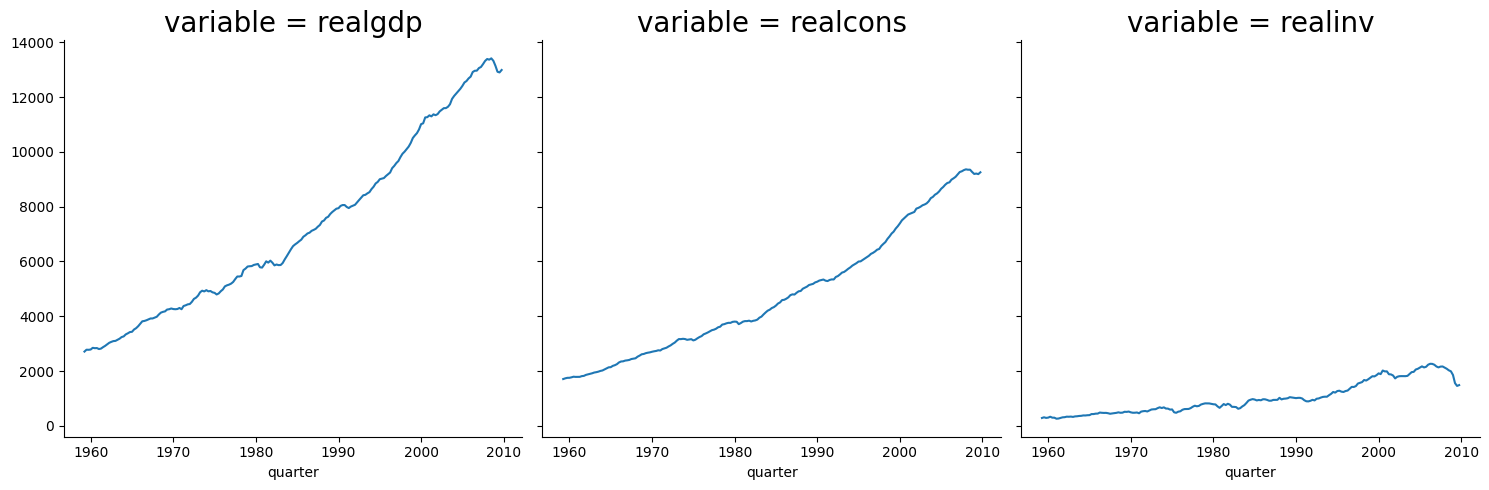

In [40]:
plot_data = target_data.stack()
plot_data = plot_data.reset_index()
plot_data.columns = ['quarter', 'variable', 'value']

g = sns.relplot(
    data=plot_data,
    x='quarter',
    y='value',
    col='variable',
    kind='line'
)
g.set_axis_labels('quarter', '').set_titles(size=20).tight_layout()
g.savefig(result_dir_path.joinpath('macro_data_plot.png'))
g

In [41]:
#定常性の検定~adf検定~gdpは定常か
adf = stattools.adfuller(target_data['realgdp'], regression='ctt')
print('t値 : {:.2f}, p値 : {:.1f}%'.format(adf[0], adf[1]*100))
print('データ数 : {}, 使用されたラグ数 : {}'.format(adf[3], adf[2]))
print('検定統計量における棄却値 : 1%={:.2f}, 5%={:.2f}, 10%={:.2f}'.format(
    adf[4]['1%'], adf[4]['5%'], adf[4]['10%']
))

t値 : -2.23, p値 : 71.5%
データ数 : 190, 使用されたラグ数 : 12
検定統計量における棄却値 : 1%=-4.43, 5%=-3.86, 10%=-3.57


In [42]:
#consは定常か
adf = stattools.adfuller(target_data['realcons'], regression='ctt')
print('t値 : {:.2f}, p値 : {:.1f}%'.format(adf[0], adf[1]*100))
print('データ数 : {}, 使用されたラグ数 : {}'.format(adf[3], adf[2]))
print('検定統計量における棄却値 : 1%={:.2f}, 5%={:.2f}, 10%={:.2f}'.format(
    adf[4]['1%'], adf[4]['5%'], adf[4]['10%']
))

t値 : -3.01, p値 : 29.1%
データ数 : 199, 使用されたラグ数 : 3
検定統計量における棄却値 : 1%=-4.43, 5%=-3.86, 10%=-3.57


In [43]:
#invは定常か
adf = stattools.adfuller(target_data['realinv'], regression='ctt')
print('t値 : {:.2f}, p値 : {:.1f}%'.format(adf[0], adf[1]*100))
print('データ数 : {}, 使用されたラグ数 : {}'.format(adf[3], adf[2]))
print('検定統計量における棄却値 : 1%={:.2f}, 5%={:.2f}, 10%={:.2f}'.format(
    adf[4]['1%'], adf[4]['5%'], adf[4]['10%']
))

t値 : -1.63, p値 : 92.3%
データ数 : 199, 使用されたラグ数 : 3
検定統計量における棄却値 : 1%=-4.43, 5%=-3.86, 10%=-3.57


In [44]:
#定常なものはなし

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

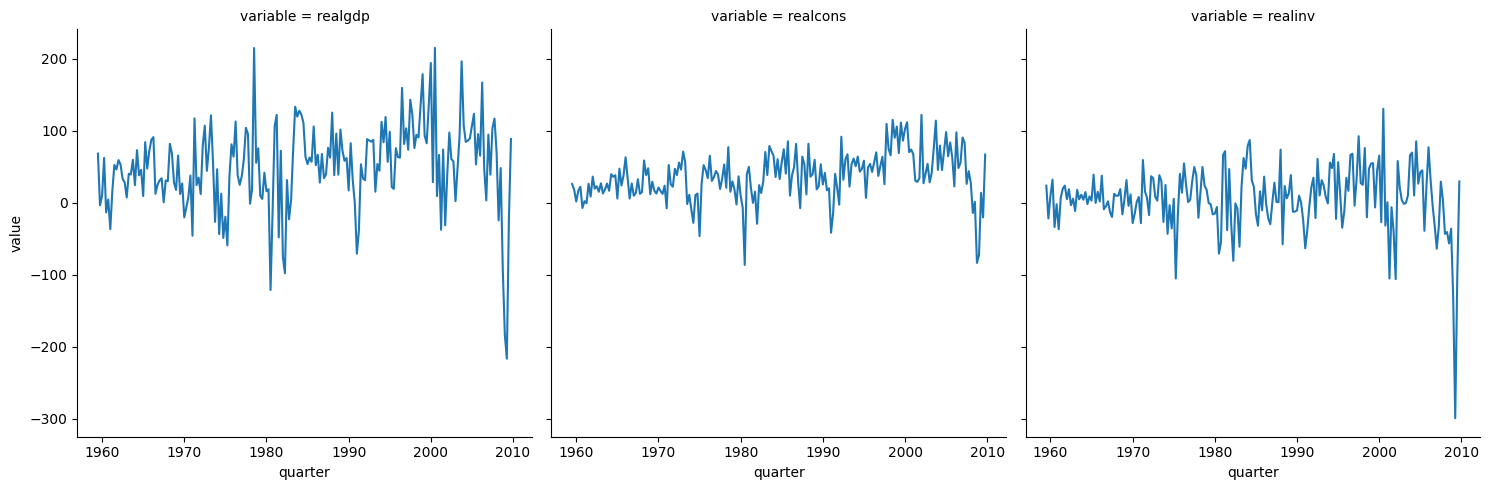

In [45]:
#データの階差をとる
target_data_diff = target_data.diff().dropna()
plot_data = target_data_diff.stack()
plot_data = plot_data.reset_index()
plot_data.columns = ['quarter', 'variable', 'value']

sns.relplot(
    data=plot_data,
    x='quarter',
    y='value',
    col='variable',
    kind='line'
)

In [46]:
#定常性の検定~adf検定~gdpのdiffは定常か
adf = stattools.adfuller(target_data_diff['realgdp'], regression='ctt')
print('t値 : {:.2f}, p値 : {:.1f}%'.format(adf[0], adf[1]*100))
print('データ数 : {}, 使用されたラグ数 : {}'.format(adf[3], adf[2]))
print('検定統計量における棄却値 : 1%={:.2f}, 5%={:.2f}, 10%={:.2f}'.format(
    adf[4]['1%'], adf[4]['5%'], adf[4]['10%']
))

t値 : -4.26, p値 : 1.4%
データ数 : 190, 使用されたラグ数 : 11
検定統計量における棄却値 : 1%=-4.43, 5%=-3.86, 10%=-3.57


In [47]:
#consの階差は定常か
adf = stattools.adfuller(target_data_diff['realcons'], regression='ctt')
print('t値 : {:.2f}, p値 : {:.1f}%'.format(adf[0], adf[1]*100))
print('データ数 : {}, 使用されたラグ数 : {}'.format(adf[3], adf[2]))
print('検定統計量における棄却値 : 1%={:.2f}, 5%={:.2f}, 10%={:.2f}'.format(
    adf[4]['1%'], adf[4]['5%'], adf[4]['10%']
))

t値 : -4.66, p値 : 0.4%
データ数 : 198, 使用されたラグ数 : 3
検定統計量における棄却値 : 1%=-4.43, 5%=-3.86, 10%=-3.57


In [48]:
#invの階差は定常か
adf = stattools.adfuller(target_data_diff['realinv'], regression='ctt')
print('t値 : {:.2f}, p値 : {:.1f}%'.format(adf[0], adf[1]*100))
print('データ数 : {}, 使用されたラグ数 : {}'.format(adf[3], adf[2]))
print('検定統計量における棄却値 : 1%={:.2f}, 5%={:.2f}, 10%={:.2f}'.format(
    adf[4]['1%'], adf[4]['5%'], adf[4]['10%']
))

t値 : -10.37, p値 : 0.0%
データ数 : 201, 使用されたラグ数 : 0
検定統計量における棄却値 : 1%=-4.43, 5%=-3.86, 10%=-3.57


In [49]:
#１次の階差ですべて定常になるので、これらでVARモデルを構築する。

In [50]:
learning_data = target_data.diff().dropna()
model = VAR(learning_data)

In [51]:
#ragをAICにより選択、AIC最小は3
model.select_order(15).summary()

,AIC,BIC,FPE,HQIC
0,21.03,21.08,1.358e+09,21.05
1,20.39,20.60*,7.159e+08,20.47
2,20.37,20.73,7.031e+08,20.52
3,20.26*,20.78,6.282e+08*,20.47*
4,20.30,20.97,6.544e+08,20.57
5,20.32,21.15,6.694e+08,20.66
6,20.34,21.32,6.801e+08,20.73
7,20.37,21.51,7.070e+08,20.84
8,20.39,21.68,7.180e+08,20.91
9,20.39,21.85,7.251e+08,20.98


In [52]:
#modelパラメータ最適化
model_result = model.fit(maxlags=15, ic='aic')
model_result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 23, Feb, 2024
Time:                     01:02:25
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    20.6099
Nobs:                     199.000    HQIC:                   20.3144
Log likelihood:          -2818.40    FPE:                5.43599e+08
AIC:                      20.1135    Det(Omega_mle):     4.69244e+08
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              12.638159         7.157543            1.766           0.077
L1.realgdp         -0.393119         0.151899           -2.588           0.010
L1.realcons         1.173272         0.192878            6.083    

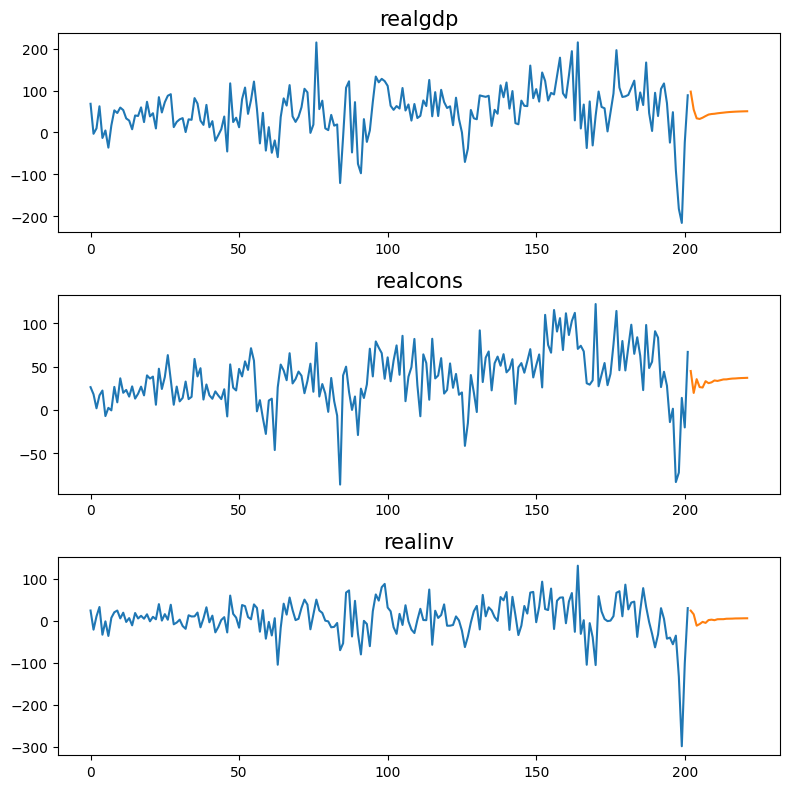

In [53]:
#予測
steps = 20
result = model_result.forecast(model_result.endog, steps=steps)

fig = plt.figure(figsize=(8, 8))
for i, variable_name in enumerate(['realgdp', 'realcons', 'realinv']):
    
    ax = fig.add_subplot(3, 1, i+1)
    y = model_result.endog[:, i]
    ax.plot(
        np.arange(len(y)),
        y
    )
    ax.plot(
        np.arange(len(y), len(y)+steps),
        result[:, i]
    )
    ax.set_title(variable_name, size=15)
    
fig.tight_layout()
plt.savefig(result_dir_path.joinpath('micro_data_predict.png'))

In [54]:
#予測分散分解
fevd_result = model_result.fevd(20)
fevd_result.summary()

FEVD for realgdp
       realgdp  realcons   realinv
0     1.000000  0.000000  0.000000
1     0.819493  0.156609  0.023898
2     0.745594  0.225750  0.028656
3     0.692096  0.263537  0.044367
4     0.663116  0.281238  0.055646
5     0.646708  0.288258  0.065034
6     0.636706  0.290706  0.072588
7     0.629012  0.292737  0.078252
8     0.623998  0.293654  0.082349
9     0.620499  0.294067  0.085434
10    0.618095  0.294313  0.087592
11    0.616529  0.294352  0.089119
12    0.615498  0.294322  0.090180
13    0.614810  0.294291  0.090899
14    0.614367  0.294248  0.091386
15    0.614078  0.294212  0.091711
16    0.613890  0.294185  0.091925
17    0.613770  0.294164  0.092066
18    0.613694  0.294149  0.092157
19    0.613646  0.294139  0.092216

FEVD for realcons
       realgdp  realcons   realinv
0     0.251170  0.748830  0.000000
1     0.232511  0.741561  0.025928
2     0.210884  0.746999  0.042117
3     0.178346  0.769495  0.052159
4     0.173118  0.758167  0.068715
5     0.167338  0.7

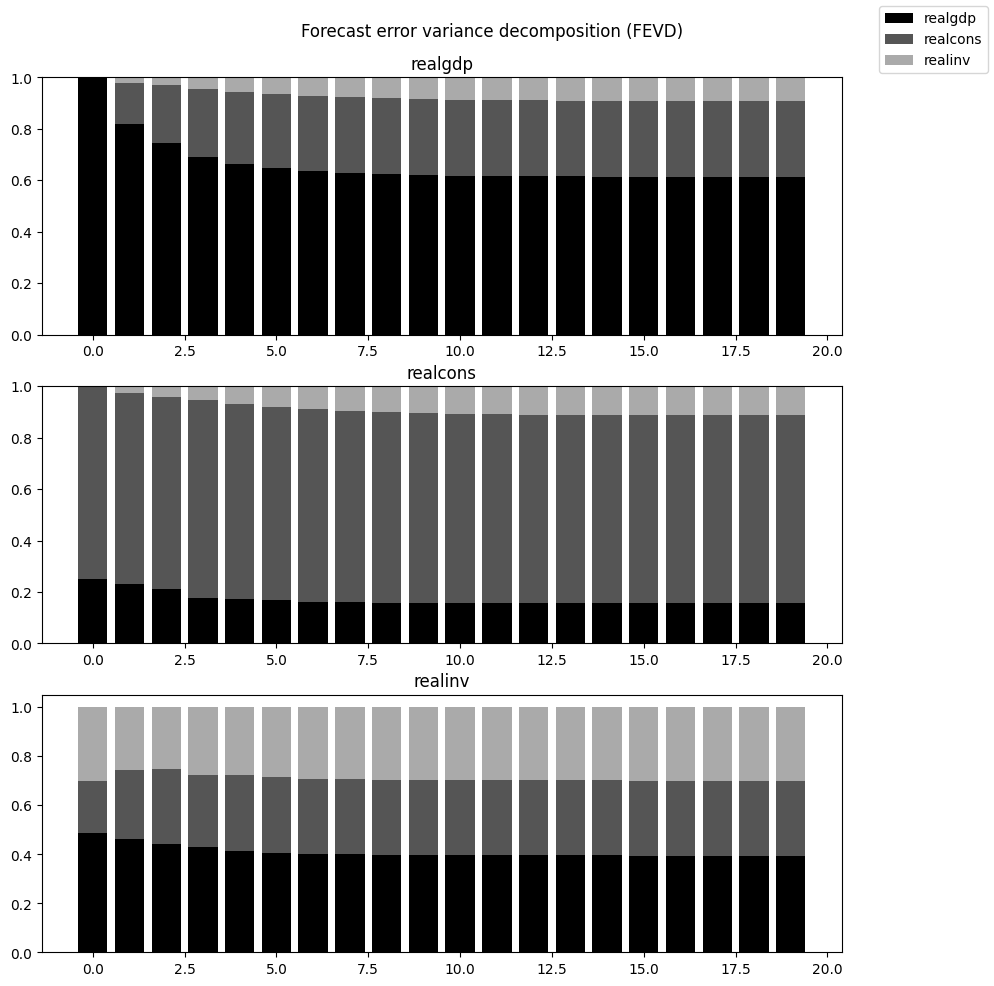

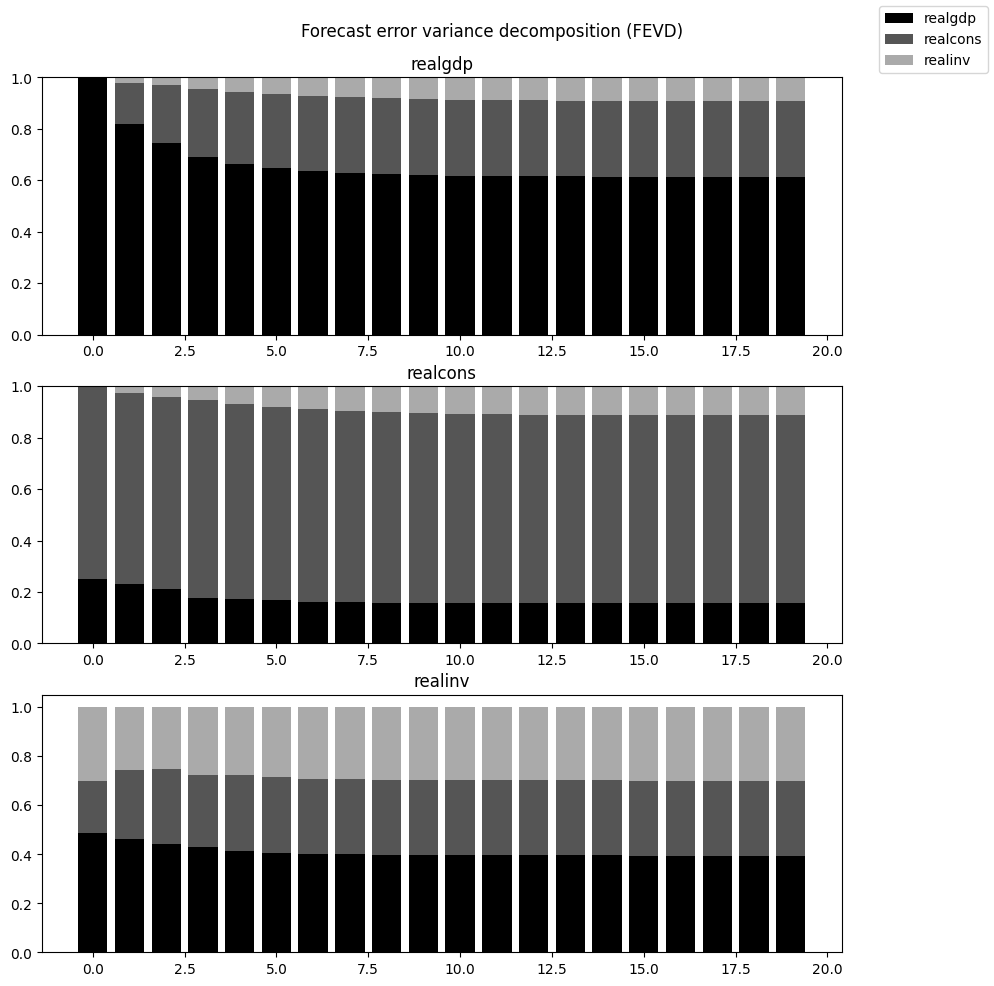

In [55]:
#予測分散分解の結果のプロット
fevd_result.plot()

In [56]:
#gdpは最初は自己の影響を強く受けるが6期ぐらいからinvの影響を強く受けるように収束する。

In [57]:
#グレンジャー因果　GDP＜－CONS
test_results = model_result.test_causality(causing=0, caused=1)  
test_results.pvalue #p値

0.00040891126512316146

In [58]:
#グレンジャー因果　GDP＜－inv
test_results = model_result.test_causality(causing=0, caused=2)  
test_results.pvalue #p値

0.11687996436960374

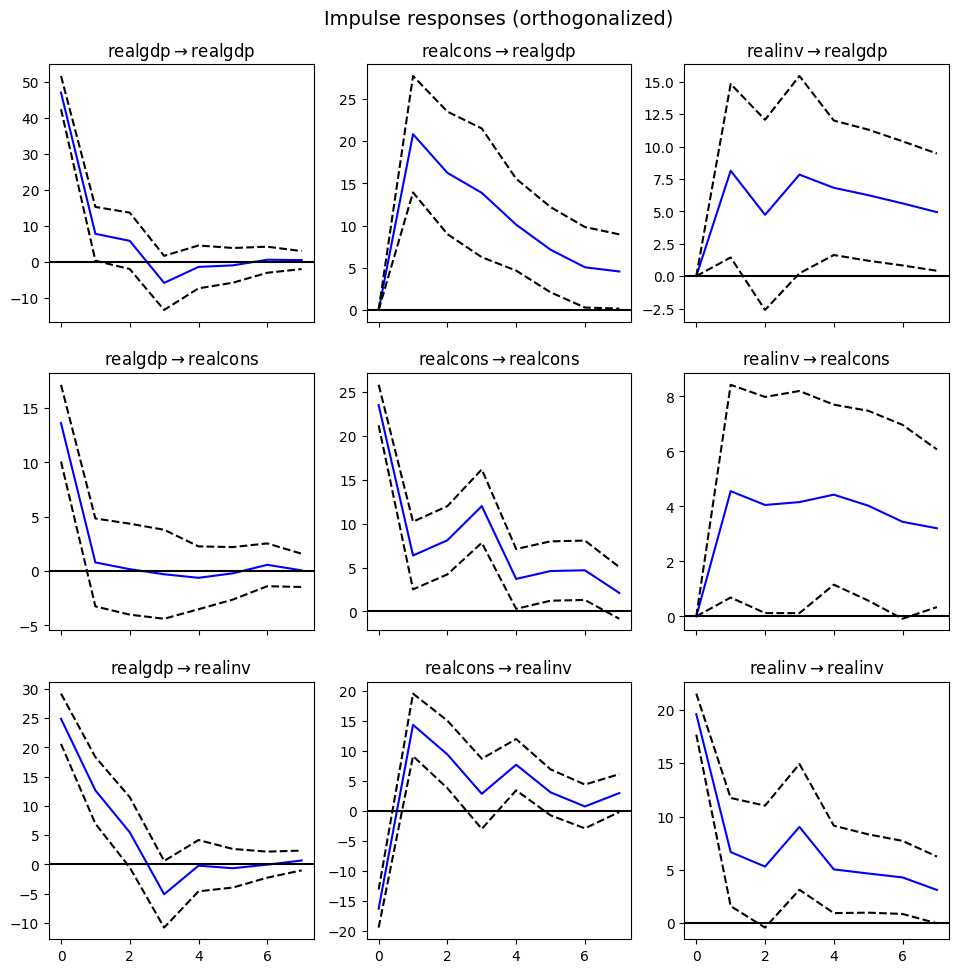

In [59]:
#インパルス応答関数
period = 7
irf = model_result.irf(period)
irf.plot(orth=True)
plt.show()